In [41]:
from dbfread import DBF
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import matplotlib as plt
import folium

dbf = DBF('World_Languages.dbf')
df = pd.DataFrame(iter(dbf))

In [2]:
df.shape # 324, 15
df.head()

,OBJECTID,SOVEREIGNT,TYPE_,COUNTRY,FIRST_OFFI,SECOND_OFF,THIRD_OFFI,ENGLISH_FI,FRENCH_FIR,ARABIC_FIR,SPANISH_FI,PORTUGUESE,CHINESE_FI,RUSSIAN_FI,WORLD_LANG
0,20,Botswana,Sovereign country,Botswana,English,,,1,0,0,0,0,0,0,English
1,21,Central African Republic,Sovereign country,Central African Republic,French,Sangho,,0,1,0,0,0,0,0,French
2,22,Canada,Sovereign country,Canada,English,French,,1,1,0,0,0,0,0,English_French
3,23,Switzerland,Sovereign country,Switzerland,German,French,Italian,0,1,0,0,0,0,0,French
4,24,Chile,Sovereign country,Chile,Spanish,,,0,0,0,1,0,0,0,Spanish


In [3]:
df_filt = df[df['FIRST_OFFI'].isin(["English", "Chinese", "Russian", "Italian", "German", "French", "Spanish"])] # Ignoring Hebrew for now
df_filt = df_filt.iloc[:, 3:5]
df_filt = df_filt.rename(columns={'COUNTRY': 'Country', 'FIRST_OFFI': 'Primary Language'})
df_filt.shape # 111, 2
df_filt.head()

,Country,Primary Language
0,Botswana,English
1,Central African Republic,French
2,Canada,English
3,Switzerland,German
4,Chile,Spanish


In [45]:
ex_conditions = [
    (df_filt['Primary Language'] == 'English'),
    (df_filt['Primary Language'] == 'Chinese'),
    (df_filt['Primary Language'] == 'Russian'),
    (df_filt['Primary Language'] == 'Italian'),
    (df_filt['Primary Language'] == 'German'),
    (df_filt['Primary Language'] == 'French'),
    (df_filt['Primary Language'] == 'Spanish')
]

ex_freq = [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

ex_df = df_filt.copy(deep=True)

ex_df['Freq'] = np.select(ex_conditions, ex_freq)

ex_df.to_csv('Cleaned world lang.csv', index=False)
ex_df

,Country,Primary Language,Freq
0,Botswana,English,0.7
1,Central African Republic,French,0.2
2,Canada,English,0.7
3,Switzerland,German,0.3
4,Chile,Spanish,0.1
...,...,...,...
221,Togo,French,0.2
224,Trinidad and Tobago,English,0.7
230,Uganda,English,0.7
232,United States Minor Outlying Islands,English,0.7


<Axes: >

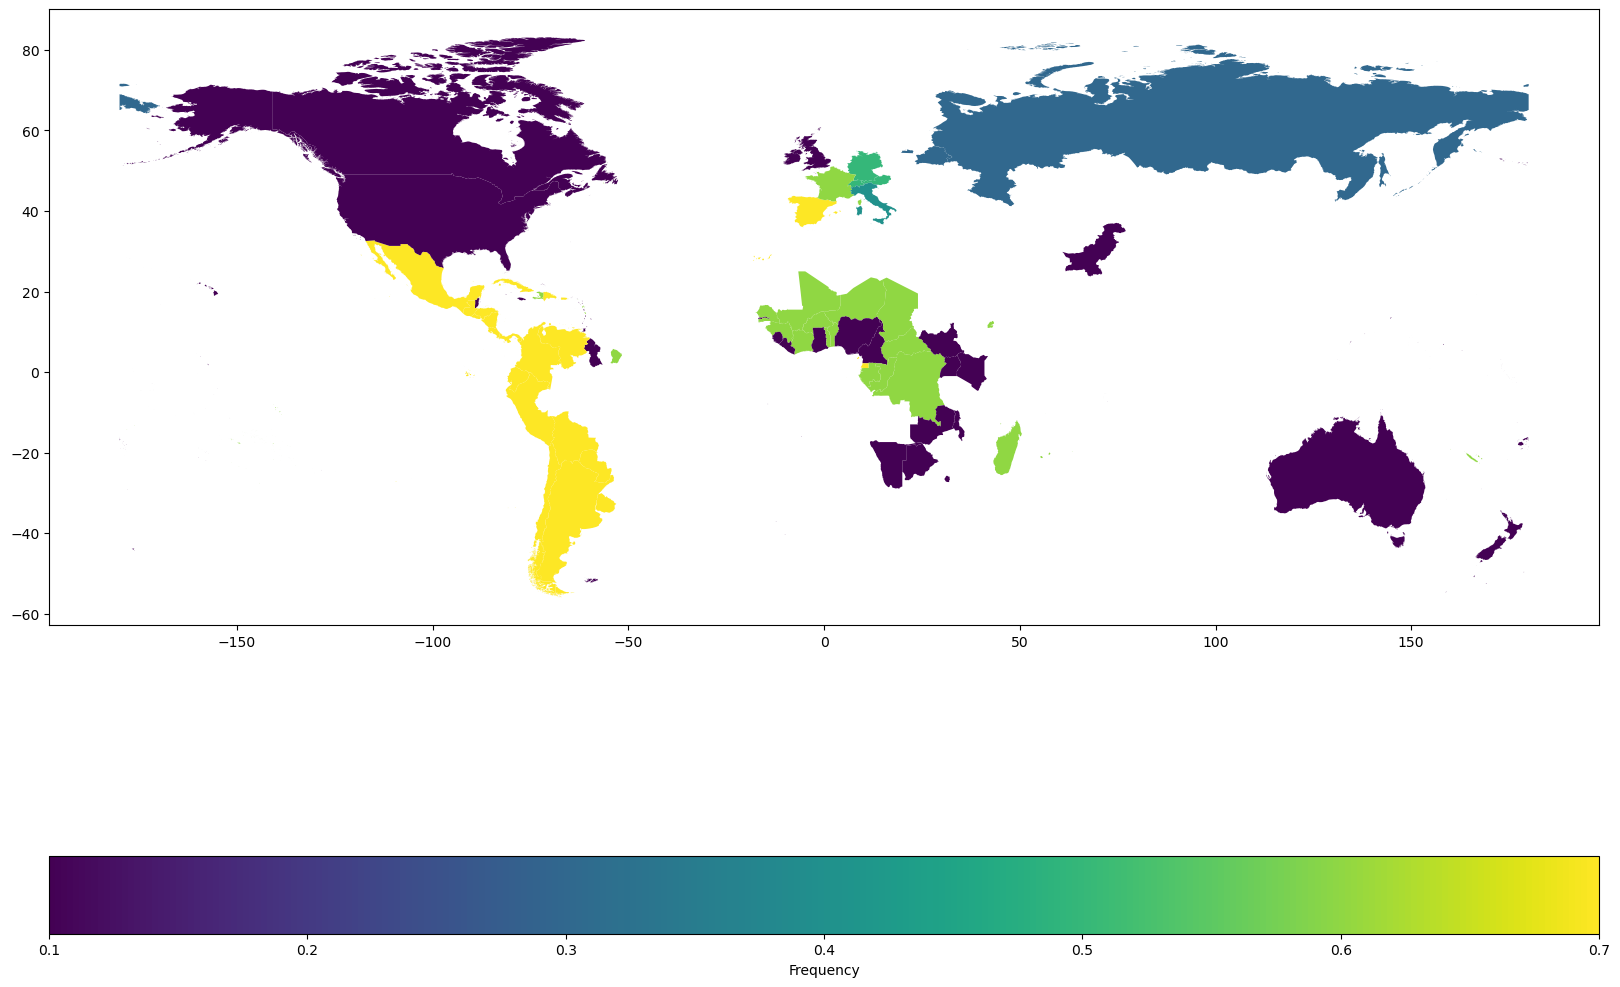

In [42]:
map = gpd.read_file("soc_071_world_languages.zip")

map_filt = map[df['FIRST_OFFI'].isin(["English", "Chinese", "Russian", "Italian", "German", "French", "Spanish"])] # Ignoring Hebrew for now
map_filt = map_filt.loc[:, ['COUNTRY', 'FIRST_OFFI', 'geometry']]
map_filt = map_filt.rename(columns={'COUNTRY': 'Country', 'FIRST_OFFI': 'Primary Language'})

ex_conditions = [
    (map_filt['Primary Language'] == 'English'),
    (map_filt['Primary Language'] == 'Chinese'),
    (map_filt['Primary Language'] == 'Russian'),
    (map_filt['Primary Language'] == 'Italian'),
    (map_filt['Primary Language'] == 'German'),
    (map_filt['Primary Language'] == 'French'),
    (map_filt['Primary Language'] == 'Spanish')
]

ex_freq = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

ex_map = map_filt.copy(deep=True)

ex_map['Freq'] = np.select(ex_conditions, ex_freq)

ex_map.plot(figsize=(20, 20), column="Freq", legend=True, legend_kwds={"label": "Frequency", "orientation": "horizontal"})

<Axes: >

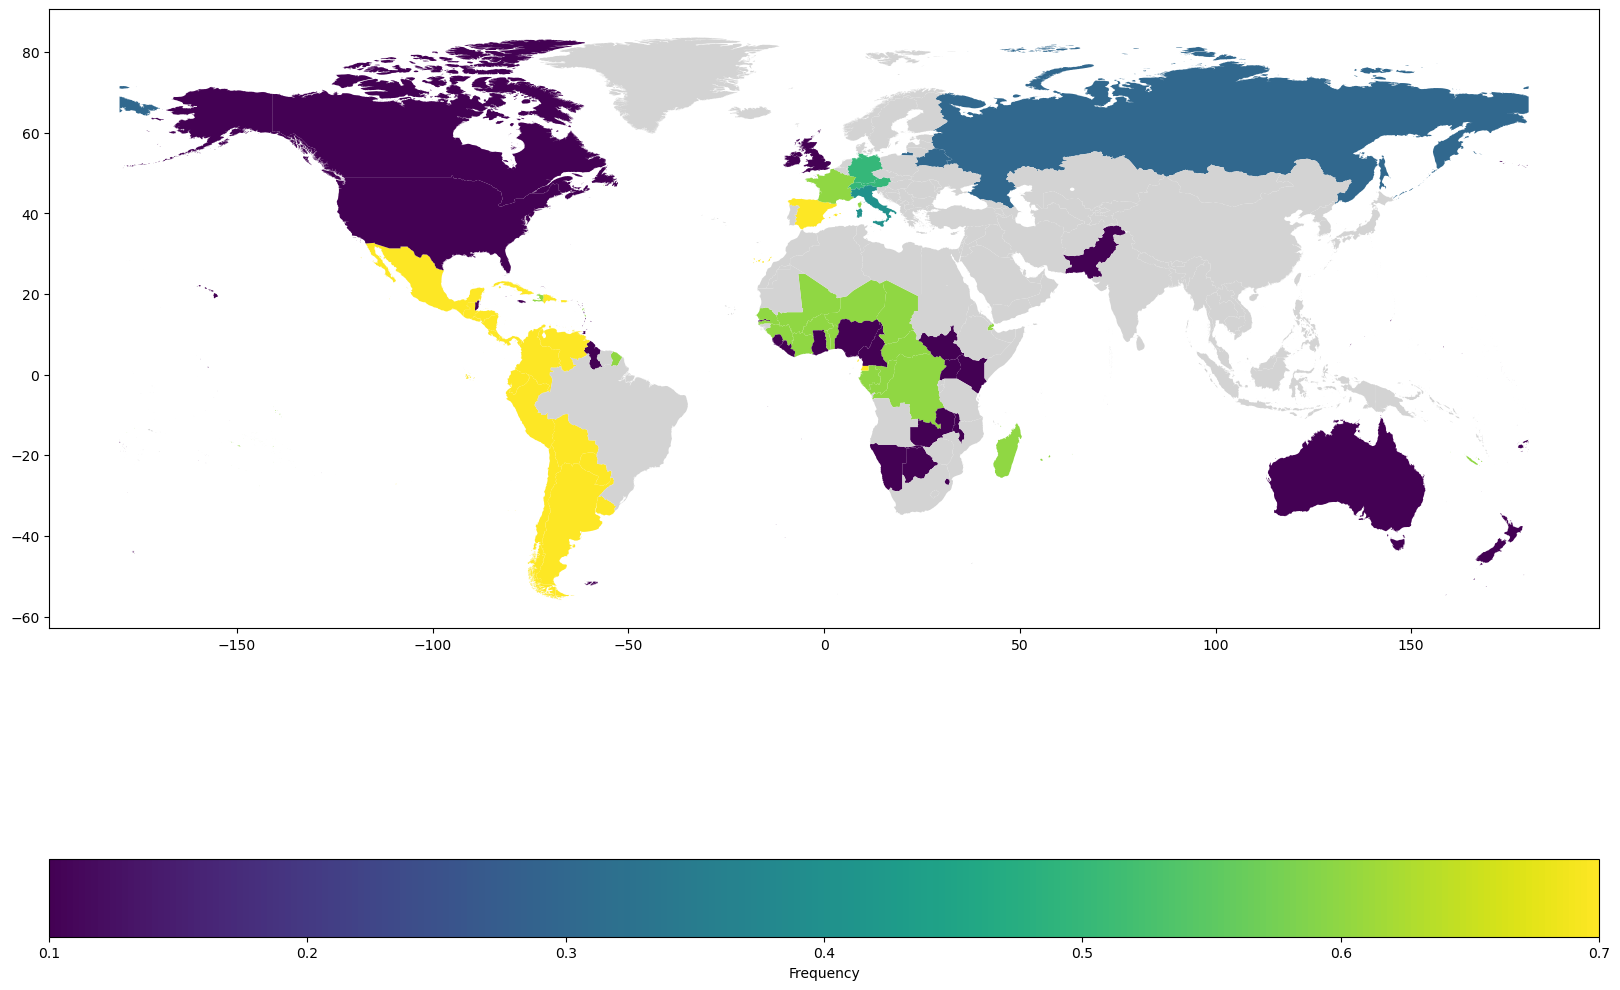

In [43]:
map = gpd.read_file("soc_071_world_languages.zip")

map_filt = map.loc[:, ['COUNTRY', 'FIRST_OFFI', 'geometry']]
map_filt = map_filt.rename(columns={'COUNTRY': 'Country', 'FIRST_OFFI': 'Primary Language'})

ex_conditions = [
    (map_filt['Primary Language'] == 'English'),
    (map_filt['Primary Language'] == 'Chinese'),
    (map_filt['Primary Language'] == 'Russian'),
    (map_filt['Primary Language'] == 'Italian'),
    (map_filt['Primary Language'] == 'German'),
    (map_filt['Primary Language'] == 'French'),
    (map_filt['Primary Language'] == 'Spanish')
]

ex_freq = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

ex_map = map_filt.copy(deep=True)

ex_map['Freq'] = np.select(ex_conditions, ex_freq, default=np.nan)

ex_map.plot(figsize=(20, 20), column="Freq", legend=True, legend_kwds={"label": "Frequency", "orientation": "horizontal"},
            missing_kwds={
                "color": "lightgrey", 
                "label": "Missing values",
    })